In [1]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dStart = datetime.datetime(2012, 1, 1)
dEnd = datetime.datetime(2021, 5, 15)

#### 1- Extraction des donnees

In [3]:
tesla = web.DataReader('TSLA', 'yahoo', dStart, dEnd)
ford = web.DataReader('F', 'yahoo', dStart, dEnd)
gm = web.DataReader('GM', 'yahoo', dStart, dEnd)

In [4]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


In [5]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [6]:
gm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-10,59.580002,57.360001,59.000000,57.410000,14591600.0,57.410000
2021-05-11,56.750000,54.869999,56.150002,55.730000,22773200.0,55.730000
2021-05-12,55.709999,53.520000,55.540001,53.759998,19348700.0,53.759998
2021-05-13,55.509998,54.130001,54.430000,54.599998,13308600.0,54.599998
2021-05-14,56.040001,55.009998,55.119999,56.000000,11305500.0,56.000000


#### 2- Visualisation des donnees

###### a/ Prix a l'ouverture

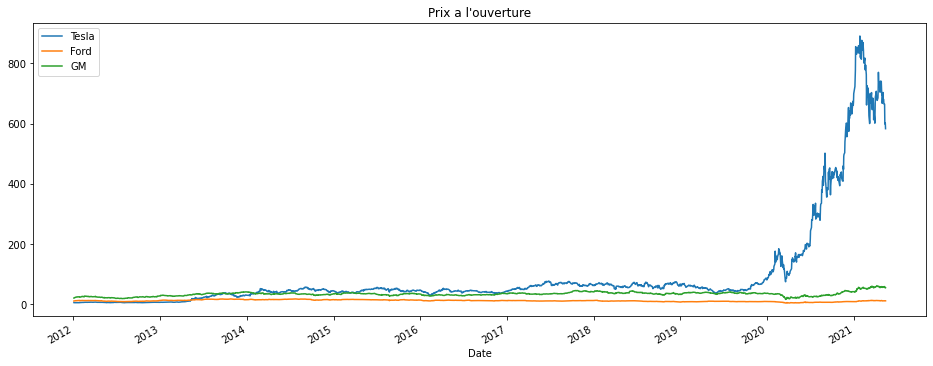

In [7]:
tesla.Open.plot(label= 'Tesla', figsize= (16, 6), title= "Prix a l'ouverture")
ford['Open'].plot(label= 'Ford')
gm['Open'].plot(label= 'GM')
plt.legend();

###### b/ Volume d'actions negociees par jour

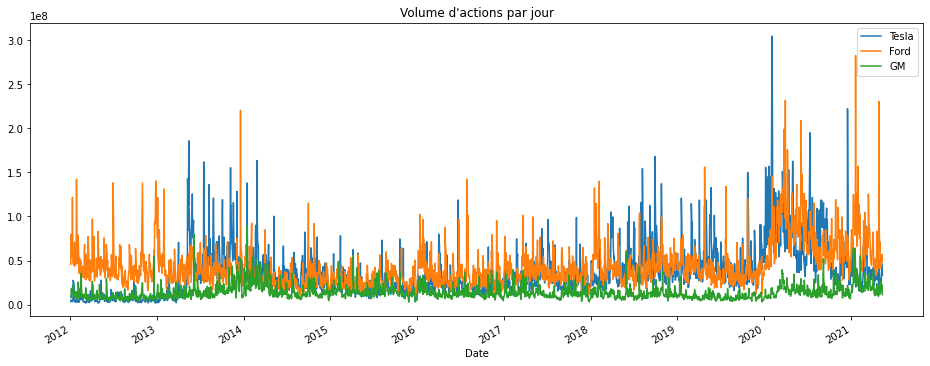

In [8]:
tesla.Volume.plot(label= 'Tesla', figsize= (16, 6), 
                  title= "Volume d'actions par jour")
ford.Volume.plot(label= 'Ford')
gm.Volume.plot(label= 'GM')
plt.legend();

###### c/ Dates des tres gros pic pour chaque societe

In [9]:
ford.Volume.idxmax()

Timestamp('2021-01-21 00:00:00')

In [10]:
tesla.Volume.idxmax()

Timestamp('2020-02-04 00:00:00')

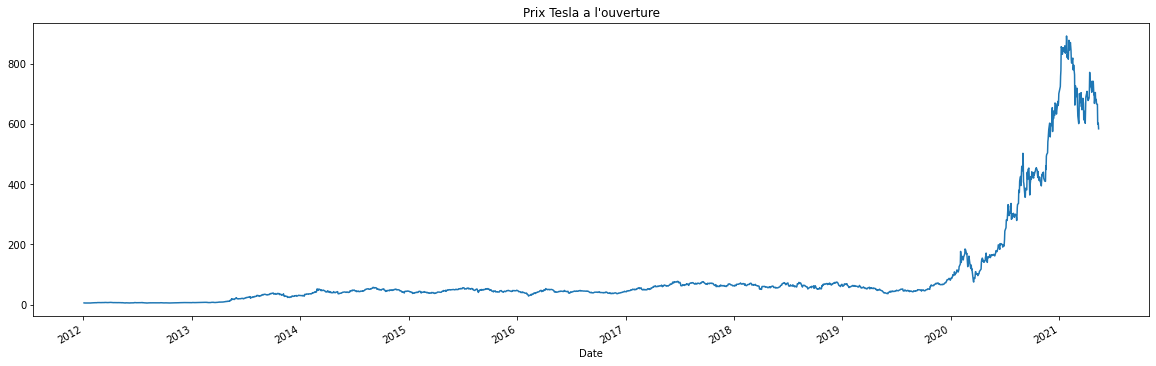

In [11]:
tesla.Open.plot(label= 'Tesla', figsize= (20, 6), 
                title= "Prix Tesla a l'ouverture");

In [12]:
gm.Volume.idxmax()

Timestamp('2014-01-15 00:00:00')

###### d/ Montant total de l'argent echange pour chaque societe

In [13]:
tesla['Total Trade'] = tesla.Volume * tesla.Open
ford['Total Trade'] = ford.Volume * ford.Open
gm['Total Trade'] = gm.Volume * gm.Open

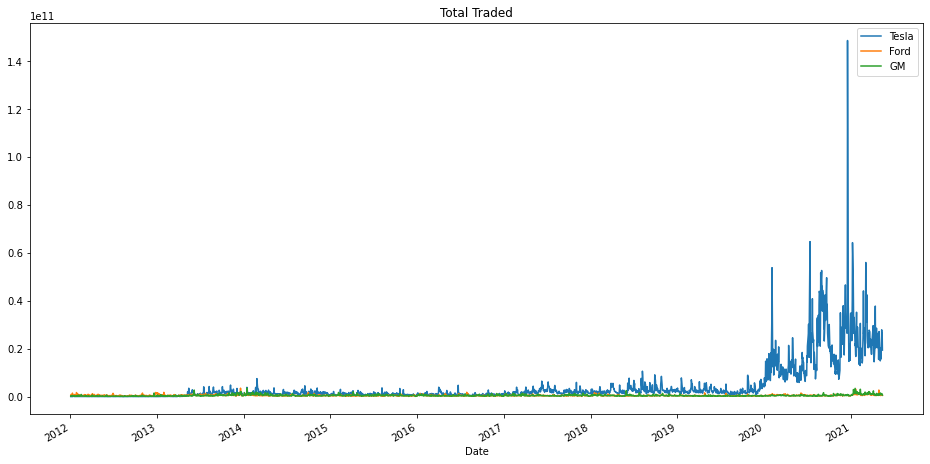

In [14]:
tesla['Total Trade'].plot(label= 'Tesla', figsize= (16, 8), 
                  title= "Total Traded")
ford['Total Trade'].plot(label= 'Ford')
gm['Total Trade'].plot(label= 'GM')
plt.legend();

In [15]:
tesla['Total Trade'].idxmax()

Timestamp('2020-12-18 00:00:00')

###### e/ Moyennes glissantes ou mobiles (MA - Moving Avarage)

In [16]:
tesla['MA50'] = tesla.Open.rolling(50).mean()
tesla['MA200'] = tesla.Open.rolling(200).mean()

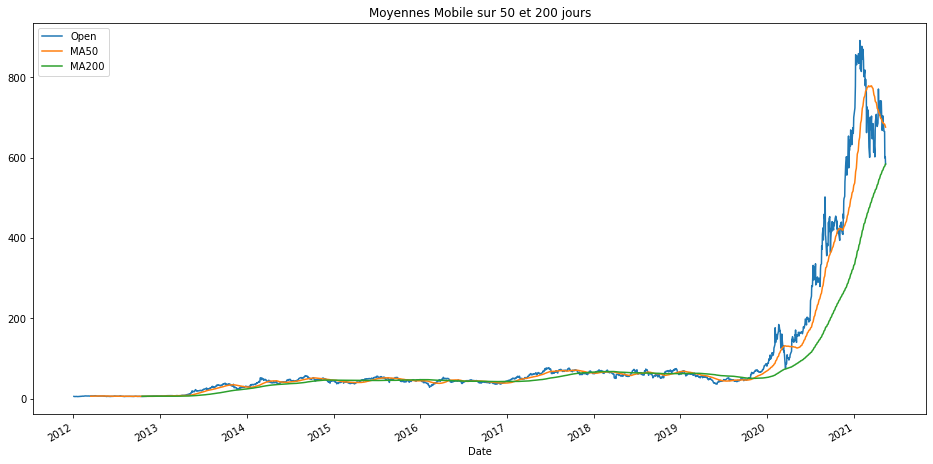

In [17]:
tesla[['Open', 'MA50', 'MA200']].plot(label= 'Tesla', 
                                      figsize= (16, 8), 
                                      title= "Moyennes Mobile sur 50 et 200 jours");

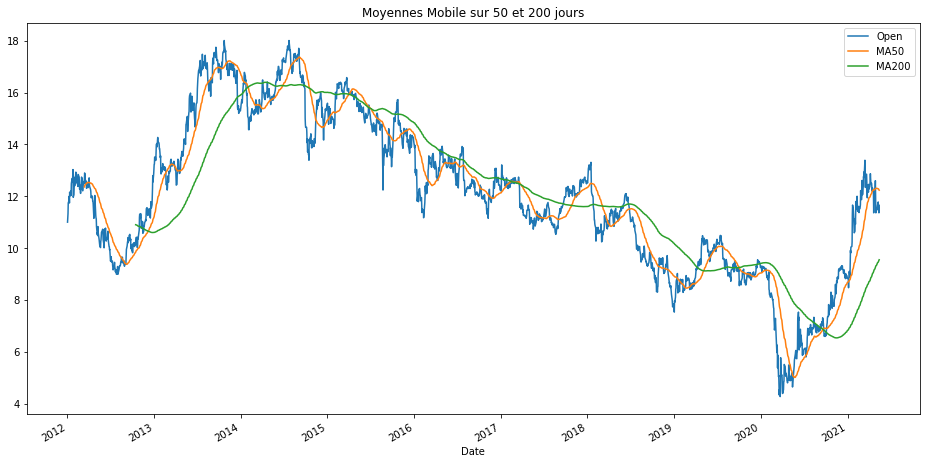

In [18]:
ford['MA50'] = ford.Open.rolling(50).mean()
ford['MA200'] = ford.Open.rolling(200).mean()
ford[['Open', 'MA50', 'MA200']].plot(label= 'Ford', 
                                      figsize= (16, 8), 
                                      title= "Moyennes Mobile sur 50 et 200 jours");

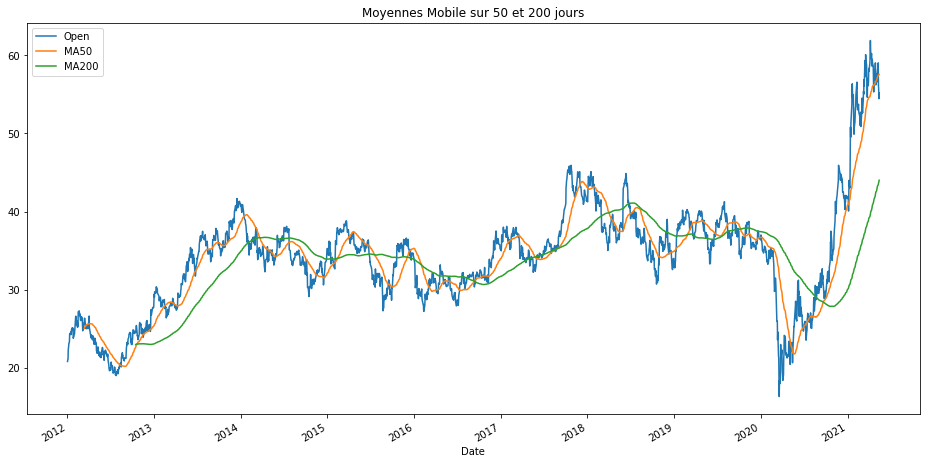

In [19]:
gm['MA50'] = gm.Open.rolling(50).mean()
gm['MA200'] = gm.Open.rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(label= 'GM', 
                                      figsize= (16, 8), 
                                      title= "Moyennes Mobile sur 50 et 200 jours");

###### f/ Matrice de dispersion pour determiner les relations entre les actions de ces societes

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
company = pd.concat([tesla.Open, gm.Open, ford.Open], axis= 1)
company.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [22]:
company.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


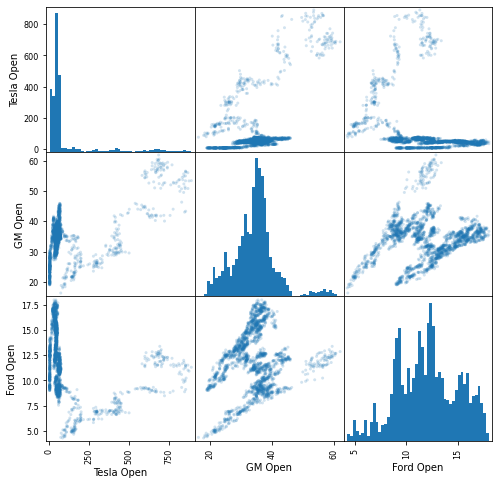

In [23]:
scatter_matrix(company, 
               figsize= (8, 8), 
               alpha= 0.2, 
               hist_kwds= {'bins': 50});

###### f/ Graphique en chandelier de chaque compagnie sur une annee precise

In [24]:
# !conda install -c conda-forge mplfinance

In [25]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import (DateFormatter, 
                              date2num, 
                              WeekdayLocator, 
                              DayLocator, 
                              MONDAY)

In [26]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,1.777512e+07,NaN,NaN
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,2.791268e+07,NaN,NaN
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,2.682736e+07,NaN,NaN
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,2.421900e+07,NaN,NaN


In [27]:
tesla_reset = tesla.loc['2020-12': '2020-12'].reset_index()

In [28]:
tesla_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200
0,2020-12-01,597.849976,572.049988,597.590027,584.760010,40103500.0,584.760010,2.396545e+10,444.156202,279.733011
1,2020-12-02,571.539978,541.210022,556.440002,568.820007,47775700.0,568.820007,2.658431e+10,446.693002,281.591711
2,2020-12-03,598.969971,582.429993,590.020020,593.380005,42552000.0,593.380005,2.510653e+10,450.390203,283.629861
3,2020-12-04,599.039978,585.500000,591.010010,599.039978,29401300.0,599.039978,1.737646e+10,454.934403,285.677931
4,2020-12-07,648.789978,603.049988,604.919983,641.760010,56309700.0,641.760010,3.406286e+10,459.163403,287.863531
5,2020-12-08,651.280029,618.500000,625.510010,649.880005,64265000.0,649.880005,4.019840e+10,463.181203,290.142081
6,2020-12-09,654.320007,588.000000,653.690002,604.479980,71291200.0,604.479980,4.660234e+10,467.935003,292.628031
7,2020-12-10,627.750000,566.340027,574.369995,627.070007,67083200.0,627.070007,3.853058e+10,470.996003,294.769881
8,2020-12-11,624.000000,596.799988,615.010010,609.989990,46475000.0,609.989990,2.858259e+10,474.481003,297.215231
9,2020-12-14,642.750000,610.200012,619.000000,639.830017,52040600.0,639.830017,3.221313e+10,478.433203,299.598971


In [29]:
tesla_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         22 non-null     datetime64[ns]
 1   High         22 non-null     float64       
 2   Low          22 non-null     float64       
 3   Open         22 non-null     float64       
 4   Close        22 non-null     float64       
 5   Volume       22 non-null     float64       
 6   Adj Close    22 non-null     float64       
 7   Total Trade  22 non-null     float64       
 8   MA50         22 non-null     float64       
 9   MA200        22 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.8 KB


In [30]:
tesla_reset['Date_ax'] = tesla_reset.Date.apply(lambda d: date2num(d))

In [31]:
tesla_reset.drop(['MA50', 'MA200'], axis= 1, inplace= True)

In [32]:
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,Date_ax
0,2020-12-01,597.849976,572.049988,597.590027,584.760010,40103500.0,584.760010,2.396545e+10,18597.0
1,2020-12-02,571.539978,541.210022,556.440002,568.820007,47775700.0,568.820007,2.658431e+10,18598.0
2,2020-12-03,598.969971,582.429993,590.020020,593.380005,42552000.0,593.380005,2.510653e+10,18599.0
3,2020-12-04,599.039978,585.500000,591.010010,599.039978,29401300.0,599.039978,1.737646e+10,18600.0
4,2020-12-07,648.789978,603.049988,604.919983,641.760010,56309700.0,641.760010,3.406286e+10,18603.0


In [33]:
tesla_reset.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Total Trade', 'Date_ax'],
      dtype='object')

In [34]:
col_lst = ['Date_ax', 'High', 'Low', 'Open', 'Close']
tesla_val = [tuple(vals) for vals in tesla_reset[col_lst].values]

In [35]:
monday = WeekdayLocator(MONDAY)
alldays = DayLocator()
weeFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

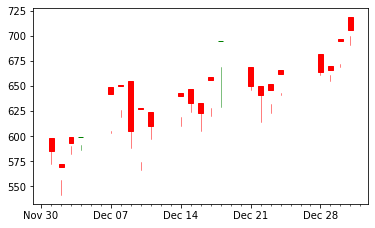

In [36]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(monday)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weeFormatter)
candlestick_ohlc(ax, tesla_val, width= 0.5, colorup= 'g', colordown= 'r');

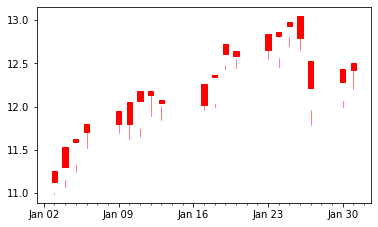

In [37]:
ford_reset = ford.loc['2012-01': '2012-01'].reset_index()
ford_reset['Date_ax'] = ford_reset.Date.apply(lambda d: date2num(d))
col_lst = ['Date_ax', 'High', 'Low', 'Open', 'Close']
ford_val = [tuple(vals) for vals in ford_reset[col_lst].values]

monday = WeekdayLocator(MONDAY)
alldays = DayLocator()
weeFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(monday)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weeFormatter)
candlestick_ohlc(ax, ford_val, width= 0.5, colorup= 'g', colordown= 'r');

#### 3- Analyse financiere

###### g/ Rendement quotidien en pourcent  
- rt = (Pt / Pt-1) - 1

In [38]:
tesla['Returns'] = (tesla.Close / tesla['Close'].shift(1)) - 1

In [39]:
tesla['Returns'] = tesla.Close.pct_change(1)

In [40]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,Returns
Date,,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,2.685921e+07,NaN,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,1.777512e+07,NaN,NaN,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,2.791268e+07,NaN,NaN,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,2.682736e+07,NaN,NaN,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,2.421900e+07,NaN,NaN,0.012635


In [41]:
gm['Returns'] = gm.Close.pct_change(1)
ford['Returns'] = ford.Close.pct_change(1)

In [42]:
ford.drop(['MA50', 'MA200'], axis= 1, inplace= True)
gm.drop(['MA50', 'MA200'], axis= 1, inplace= True)

In [43]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,-0.003490


In [44]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


##### b/ Action la plus volatile

<AxesSubplot:>

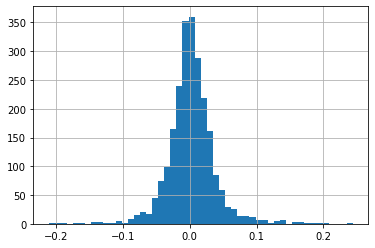

In [49]:
tesla.Returns.hist(bins= 50);

<AxesSubplot:>

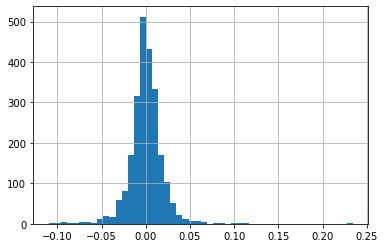

In [50]:
ford.Returns.hist(bins= 50);

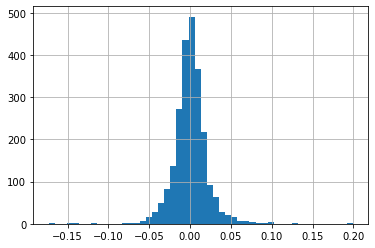

In [51]:
gm.Returns.hist(bins= 50);

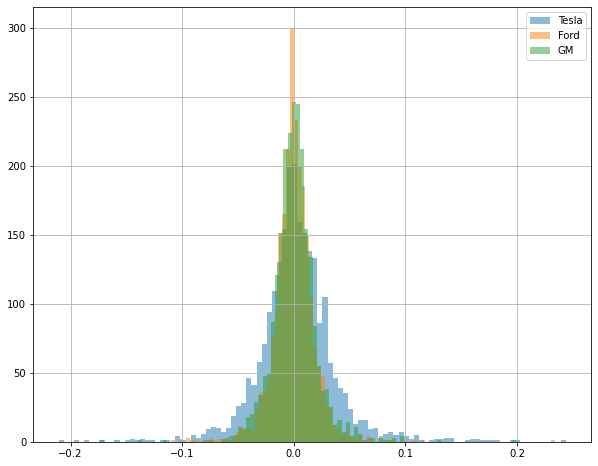

In [55]:
tesla.Returns.hist(bins= 100, label= 'Tesla', figsize=(10, 8), alpha= 0.5)
ford.Returns.hist(bins= 100, label= 'Ford', alpha= 0.5)
gm.Returns.hist(bins= 100, label= 'GM', alpha= 0.5)
plt.legend();

##### c/ Estimation de la densite de noyau (KDE)

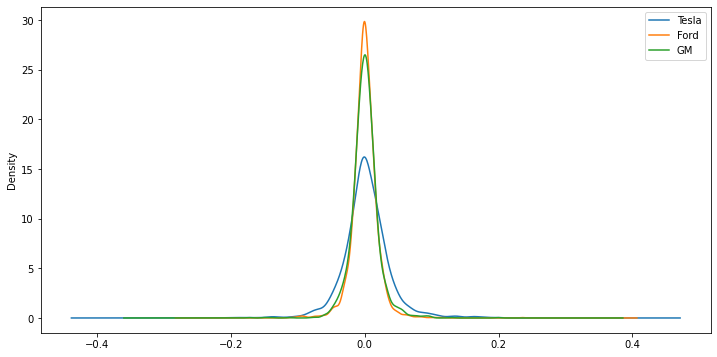

In [57]:
tesla.Returns.plot(kind= 'kde', label= 'Tesla', figsize=(12, 6))
ford.Returns.plot(kind= 'kde', label= 'Ford')
gm.Returns.plot(kind= 'kde', label= 'GM')
plt.legend();

##### d/ ROI journalier 

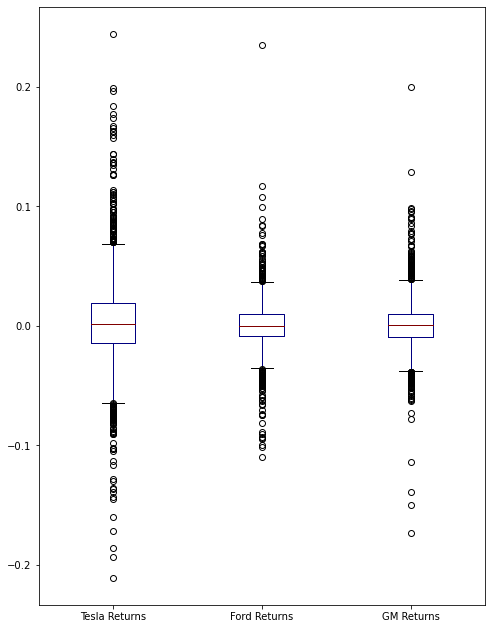

In [60]:
box_df = pd.concat([tesla.Returns, ford.Returns, gm.Returns], axis= 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'GM Returns']
box_df.plot(kind= 'box', figsize= (8, 11), colormap= 'jet');

##### e/ Comparaison des rendements quotidiens entre les actions

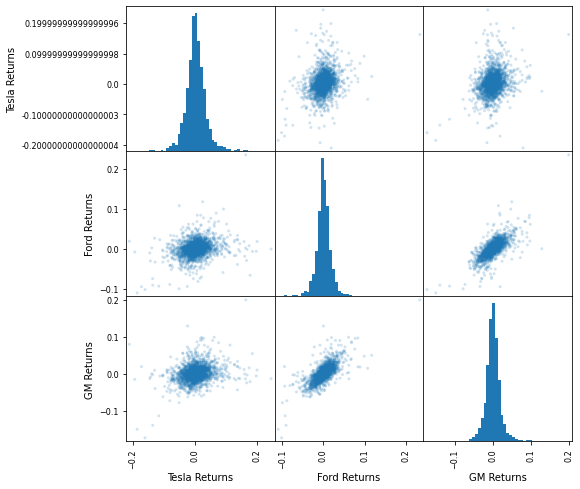

In [61]:
scatter_matrix(box_df, figsize=(8, 8), alpha= 0.2, hist_kwds= {'bins': 50});

##### f/ Correlation entre ford et gm

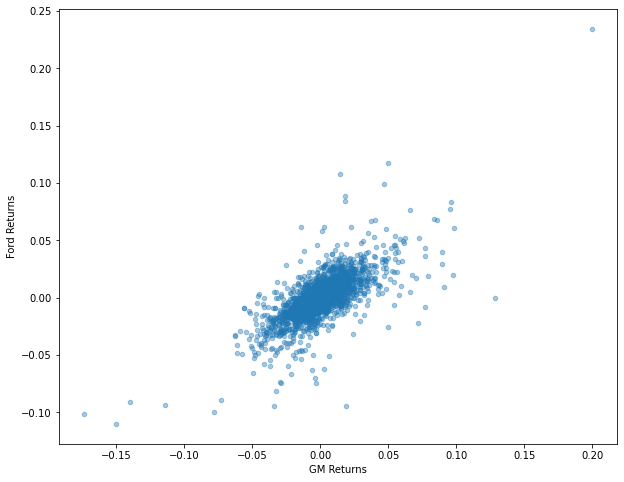

In [66]:
box_df.plot(kind= 'scatter', 
            x= 'GM Returns', 
            y= 'Ford Returns', 
            alpha= 0.4, figsize=(10, 8));

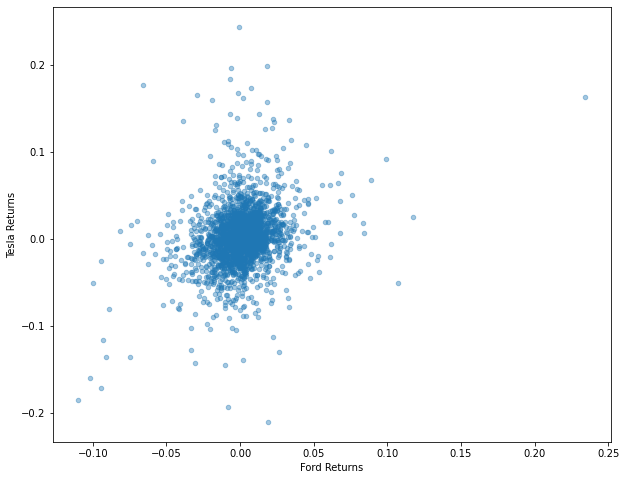

In [68]:
box_df.plot(kind= 'scatter', 
            x= 'Ford Returns', 
            y= 'Tesla Returns', 
            alpha= 0.4, figsize=(10, 8));